In [1]:
%matplotlib inline

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray
import xbout
import scipy
import re

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))

from hermes3.utils import *
# from gridtools.hypnotoad_tools import *
# from gridtools.b2_tools import *
# from gridtools.utils import *

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *

from code_comparison.code_comparison import *
from code_comparison.viewer_2d import *


%load_ext autoreload
%autoreload 2


print("Done")


st40_phys_viewer can not be loaded from outside Tokamak Energy!

Gridtools not found
Done


In [2]:
from gridtools.solps_python_scripts.read_b2fgmtry import *

# Hermes IO

In [3]:
casestore = dict()
db = CaseDB()

In [7]:
[print(x) for x in db.casepaths if "d14ab" in x]

d14ab-2e19_tn30_latest_edgerec
d14abb-orig_fluxlim_1
d14abc-flim1_no_nn_in_en
d14abd-also_escaping_core


[None, None, None, None]

In [9]:
db = CaseDB()

toload = [
    dict(name="base", id="d11b-d10d_2e19", grid="g3b2-fatter_newhypno.nc", unnormalise_geom = True),
    dict(name="decaylength", id="d13a-d11b_decaylength", grid="g3b2-fatter_newhypno.nc", unnormalise_geom = True),
    dict(name="edgerecycle", id="d14ab-2e19_tn30_latest_edgerec", grid="g3b2-fatter_newhypno.nc", unnormalise_geom = True),
    dict(name="fluxlim1", id="d14abb-orig_fluxlim_1", grid="g3b2-fatter_newhypno.nc", unnormalise_geom = True),
    dict(name="fewercoll", id="d14abc-flim1_no_nn_in_en", grid="g3b2-fatter_newhypno.nc", unnormalise_geom = True),
    dict(name="escapecore", id="d14abd-also_escaping_core", grid="g3b2-fatter_newhypno.nc", unnormalise_geom = True),
]

for case in toload:
    casestore[case["name"]] = Load.case_2D(db.casepaths[case["id"]], gridfilepath = db.gridpaths[case["grid"]],
                                           double_load = False, keep_xboundaries = True, keep_yboundaries = True,
                                           unnormalise_geom = case["unnormalise_geom"])

CHECK: Total domain volume is 1.942E+00 [m3]
CHECK: Total domain volume is 1.942E+00 [m3]
CHECK: Total domain volume is 1.942E+00 [m3]
CHECK: Total domain volume is 1.942E+00 [m3]
CHECK: Total domain volume is 1.942E+00 [m3]
CHECK: Total domain volume is 1.942E+00 [m3]


In [10]:
plt.close("all")
%matplotlib inline

In [11]:
write_file(casestore, r"C:\Users\mikek\OneDrive\Project\collab\tech\notebooks\allbc_tn=30.pkl")

C:\Users\mikek\OneDrive\Project\collab\tech\notebooks\allbc_tn=30.pkl written


In [ ]:
casestore = read_file(r"C:\Users\mikek\OneDrive\Project\collab\tech\notebooks\allbc_tn=30.pkl")

## Read Hermes data

In [12]:
hr = dict()
for hermes_case in casestore.keys():
    print(hermes_case)
    hr[hermes_case] = Hermesdata()
    hr[hermes_case].read_case(casestore[hermes_case].ds.isel(t=-1, x = slice(2,-2)))

base
decaylength
edgerecycle
fluxlim1
fewercoll
escapecore


# Read SOLEDGE CSV data

In [13]:
soledgecases = {
    "tightwall_1e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_1e19"), # Hermes-3 like wall
    "tightwall_2e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_2e19"), # Hermes-3 like wall
    "tightwall_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_3e19"), # Hermes-3 like wall
    "widewall_1e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_1e19"), 
    "widewall_2e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_2e19"), 
    "widewall_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_3e19"), 
}

sl = dict()

for name in soledgecases:
    path = soledgecases[name]
    sl[name] = SOLEDGEdata()
    sl[name].read_csv(os.path.join(path, "omp_plasma.csv"), mode = "plot1d_omp")
    sl[name].read_csv(os.path.join(path, "omp_neutrals.csv"), mode = "plot1d_omp")
    sl[name].read_csv(os.path.join(path, "imp_plasma.csv"), mode = "plot1d_imp")
    sl[name].read_csv(os.path.join(path, "imp_neutrals.csv"), mode = "plot1d_imp")
    sl[name].read_csv(os.path.join(path, "wall_ntmpi_plasma.csv"), mode = "wall_ntmpi")



In [24]:
path = soledgecases["nocore_d"]
sl["nocore_d"].read_csv(os.path.join(path, "wall_ntmpi_plasma.csv"), mode = "wall_ntmpi")

## Read SOLPS

In [6]:
solpscases = {
    "base" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5"),
    "noiz_core" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16"),
    "gammai_2.5" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.GAMMAI=2.5E+00"),
    "dpuff_1e22" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.D2PUFF=1.0E+22"),
    "dpuff_5e21" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.D2PUFF=5.0E+21"),
    "no_fast_reflec" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.Pf=0"),
    "nsep_2e19" : os.path.join(onedrive_path,r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\.core_extent.b2tqca_phm0=0.nesepm=2E+19"),
    "nsep_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\.core_extent.b2tqca_phm0=0.nesepm=3E+19"),
    "narrow_core" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.core_extent"),
    "no_visc" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.core_extent.b2tqca_phm0=0")
}

sp = dict()

for name in solpscases:
    sp[name] = SOLPSdata()
    sp[name].read_last10s(solpscases[name])

c:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5\last10s.pkl loaded
c:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16\last10s.pkl loaded
c:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.GAMMAI=2.5E+00\last10s.pkl loaded
c:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.D2PUFF=1.0E+22\last10s.pkl loaded
c:\Users\mikek\OneDrive\Project\collab\tech\co

In [ ]:
solps = sp["nsep_2e19"].regions["omp"]["rfluxa3da"]

In [20]:
for name in casestore:

    ds = casestore[name].ds
    ds = calculate_radial_fluxes(ds)



# Lineplots

In [8]:
plt.close("all")
%matplotlib inline

In [14]:
casestore.keys()

dict_keys(['base', 'decaylength', 'edgerecycle', 'fluxlim1', 'fewercoll', 'escapecore'])

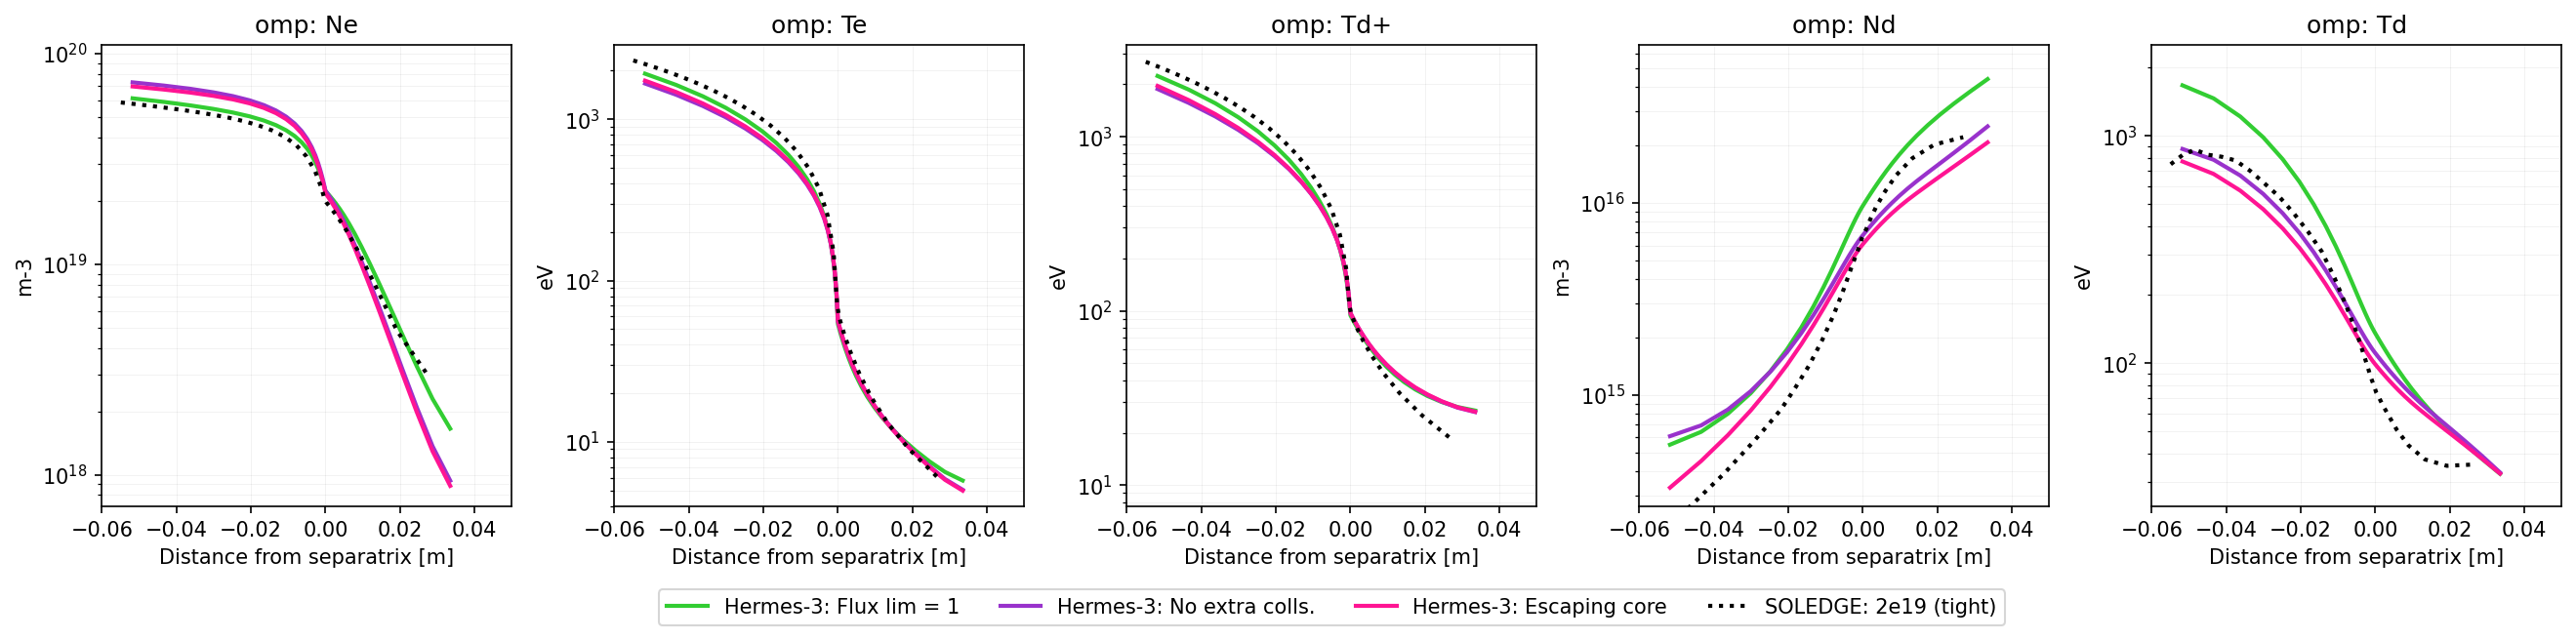

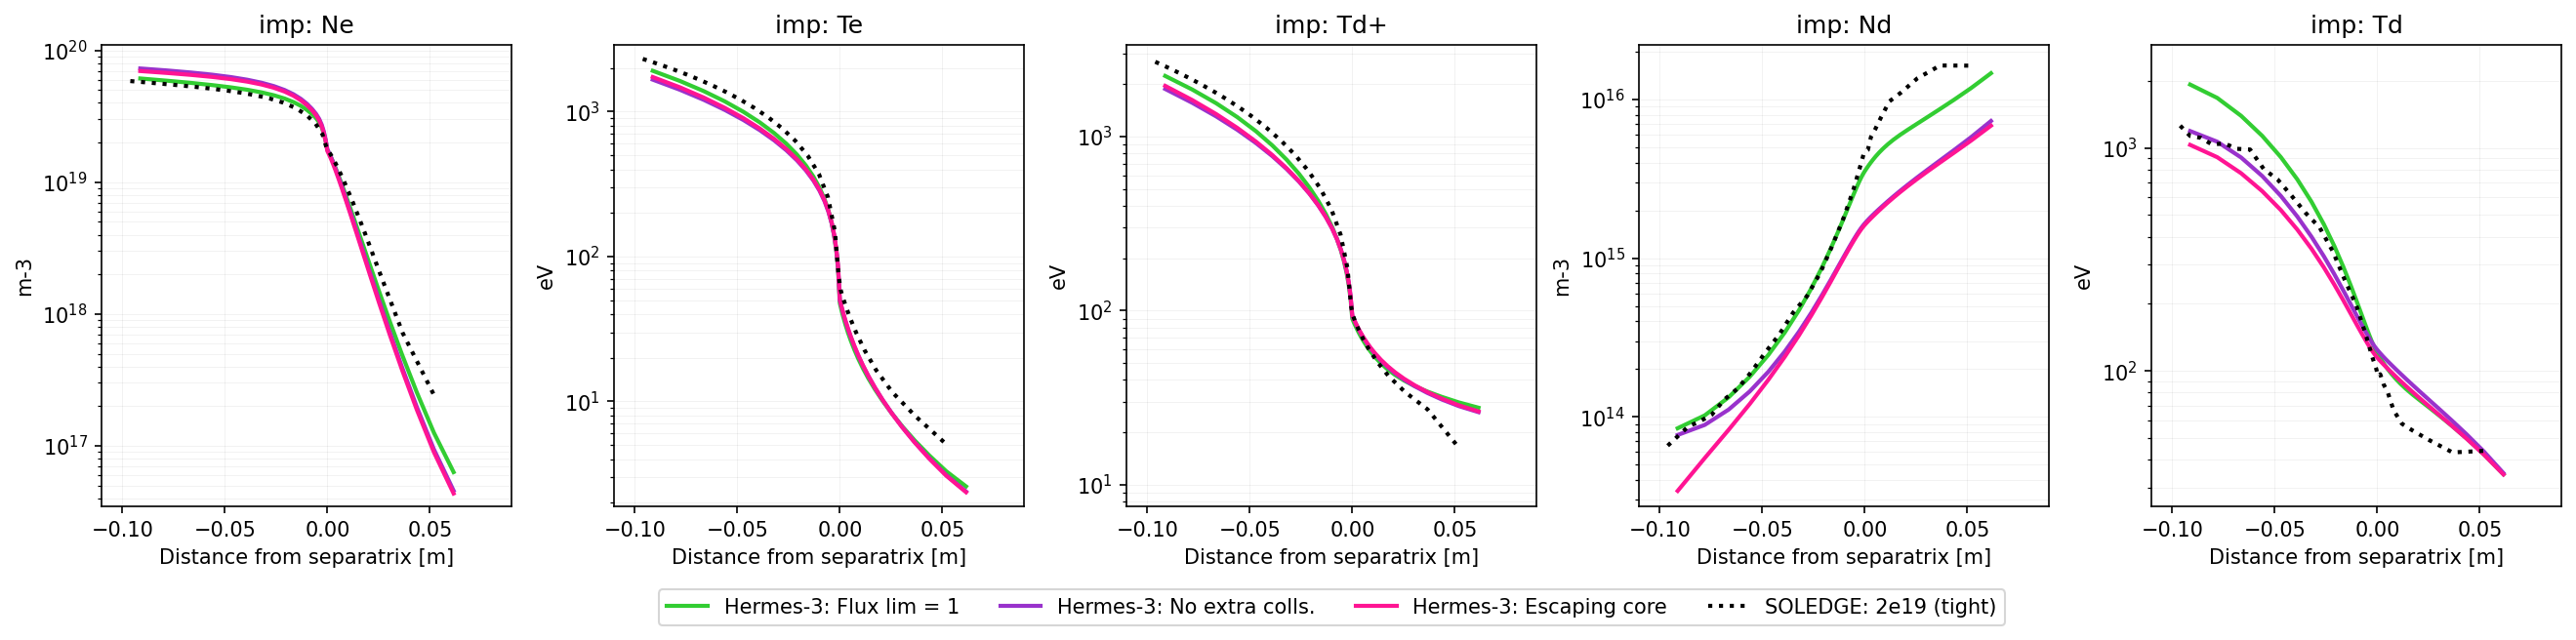

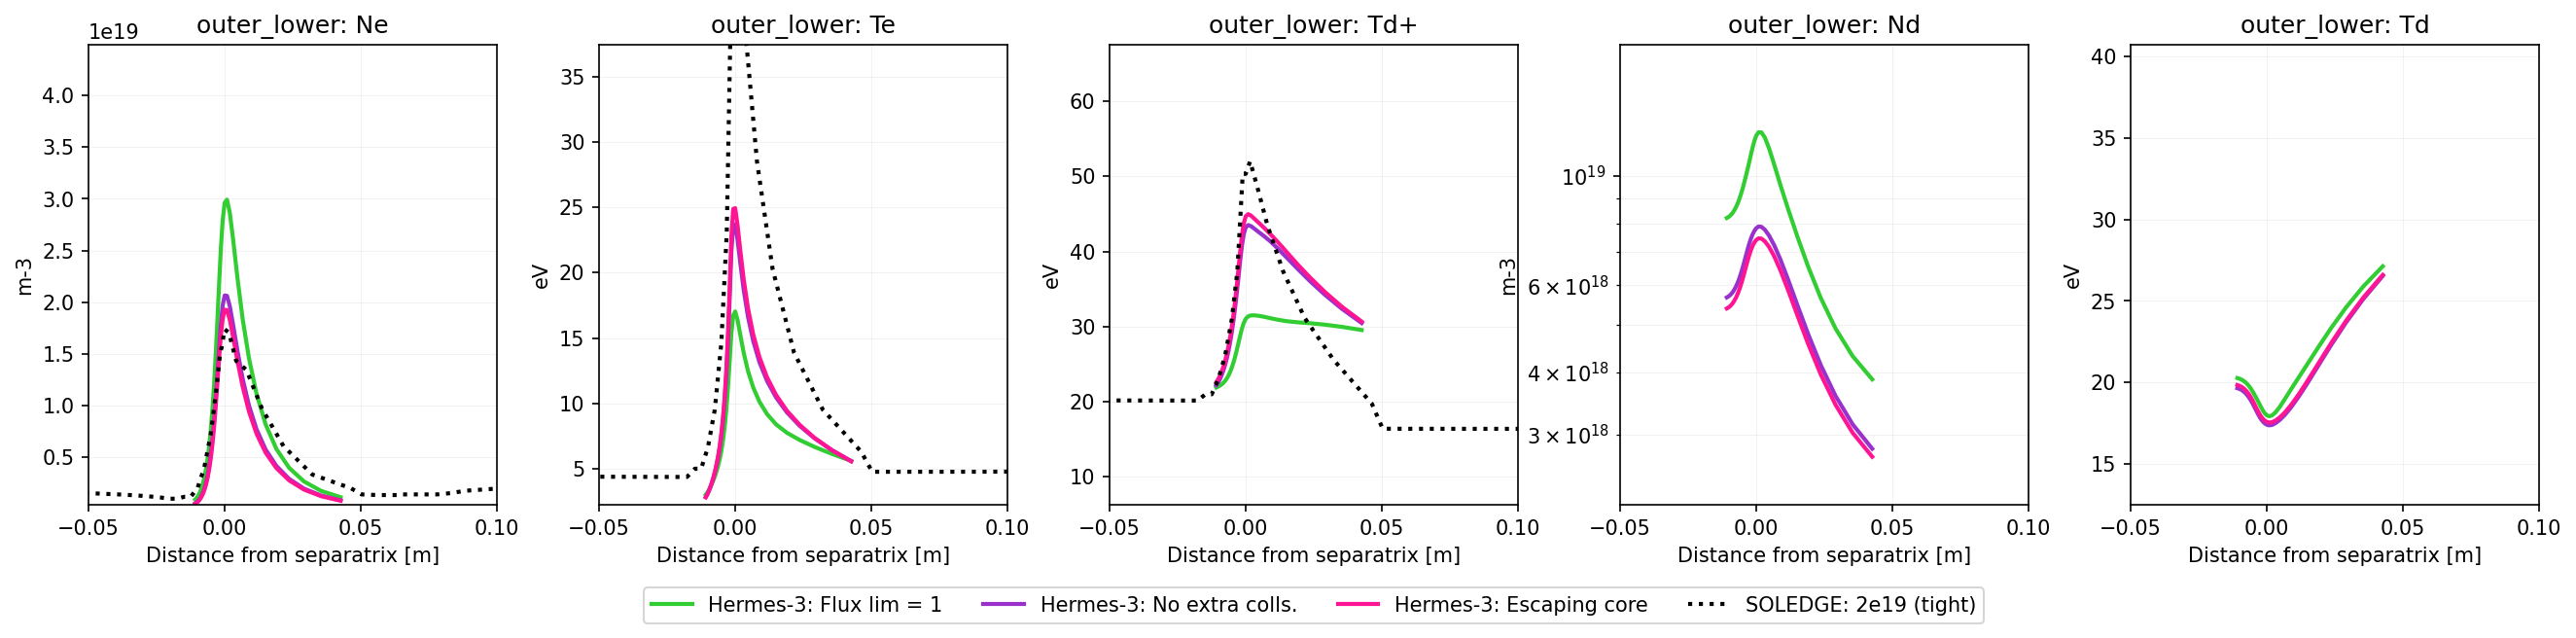

In [19]:

plt.close("all")
lineplot_compare(
    cases = { 
             
    # "Hermes-3: Base": dict(data=hr["base"], color = "teal"),
    # "Hermes-3: Decay length": dict(data=hr["decaylength"], color = "darkorange"),
    # "Hermes-3: Edge rec.": dict(data=hr["edgerecycle"], color = "firebrick"),
    "Hermes-3: Flux lim = 1": dict(data=hr["fluxlim1"], color = "limegreen"),
    "Hermes-3: No extra colls.": dict(data=hr["fewercoll"], color = "darkorchid"),
    "Hermes-3: Escaping core": dict(data=hr["escapecore"], color = "deeppink"),

    
    # "SOLEDGE: 1e19 (tight)" : dict(data=sl["tightwall_1e19"], color="#3288bd"),
    "SOLEDGE: 2e19 (tight)" : dict(data=sl["tightwall_2e19"], color="black"),
    
    # "SOLEDGE: 1e19" : dict(data=sl["widewall_1e19"], color = "blue"),
    # "SOLEDGE: 2e19" : dict(data=sl["widewall_2e19"], color = "red")
    # "SOLPS: 3e19" : dict(data=sp["nsep_3e19"], color="#fc8d59"),
    
    # "Hermes-3: 1e19": dict(data=hr["1e19"], color="teal"),
    # "SOLPS: 1e19" : dict(data=sp["no_visc"], color= "darkorange"),
    # "SOLEDGE: 1e19" : dict(data=sl["nocore_d"], color="cyan"),
    # "SOLEDGE: 1e19, tight wall" : dict(data=sl["tightwall"], color="deeppink"),
    
    # "Hermes-3: Tn_sol=30eV" : dict(data=hr["tn30"], color="teal"),
    # "Hermes-3: Tn_sol=0.03eV" : dict(data=hr["tn0.03_nonsepfit"], color="darkorange"),
    # "Hermes-3: Tn_sol=0.03eV" : dict(data=hr["tn0.03"], color="darkorange"),
    
    },
    # regions = ["omp", "imp"], params = ["Ne", "Td+", "Te"],
    # regions = ["omp", "imp"], params = ["Nd", "Td", "Sd+_iz"],
    regions = ["omp", "imp", "outer_lower"], params = ["Ne", "Te", "Td+", "Nd", "Td"],
    # regions = ["omp", "imp"], params = ["Ne", "Nd",  "Te"],
    # regions = ["omp", "imp", "outer_lower"], params = ["Nd", "Td"],
    # regions = ["omp"], params = []
    mode = "log",
    dpi = 150,
    lw = 2
)

# How much neutral heat escapes down the outer wall?

In [23]:
ds = calculate_target_fluxes(ds)

Calculating target recycling:
inner_lower
outer_lower
inner_upper
outer_upper


In [ ]:
calculate_heat_balance(ds)

In [ ]:
ds.data_vars

## Outer wall

In [43]:

ds = casestore["escapecore"].ds.isel(t=-1)

hflows = {}


hflows["outer_sol"] = ds.hermesm.select_region("outer_sol_edge")["hf_perp_diff_R_d"].sum("theta").values * 1e-6
hflows["inner_sol"] = ds.hermesm.select_region("inner_sol_edge")["hf_perp_diff_L_d"].sum("theta").values * 1e-6
hflows["lower_pfr_edge"] = ds.hermesm.select_region("lower_pfr_edge")["hf_perp_diff_L_d"].sum("theta").values * 1e-6
hflows["upper_pfr_edge"] = ds.hermesm.select_region("upper_pfr_edge")["hf_perp_diff_L_d"].sum("theta").values * 1e-6
# plot_selection(ds, ds.hermesm.select_region("outer_sol_edge"))

tot = 0
for name in hflows:
    print(name, hflows[name])
    tot += hflows[name]
    
print(f"Total: {tot}")

In [45]:
tot = 0
for name in hflows:
    print(name, hflows[name])
    tot += hflows[name]
    
print(f"Total: {tot}")

outer_sol [0.08270761]
inner_sol [0.01567151]
lower_pfr_edge [0.]
upper_pfr_edge [0.]
Total: [0.09837912]


In [35]:
domain = ds.hermesm.select_region("inner_sol_edge")
domain["hf_perp_tot_L_d"].sum("theta").values * 1e-6

array([0.01535497])

In [ ]:
domain = ds.hermesm.select_region("inner_sol_edge")
domain["hf_perp_tot_L_d"].sum("theta").values * 1e-6

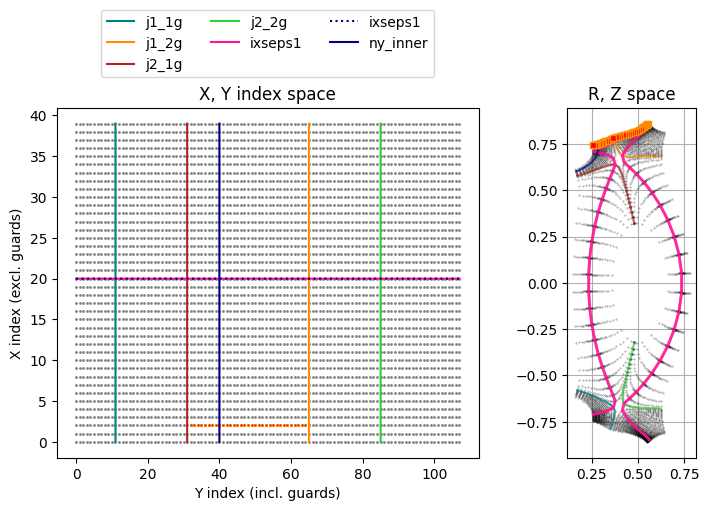

In [42]:
plot_selection(ds, ds.hermesm.select_region("upper_pfr_edge"))

In [26]:
ds.data_vars

Data variables:
    Bxy                              (x, theta) float64 dask.array<chunksize=(8, 7), meta=np.ndarray>
    Dnnd                             (t, x, theta) float64 dask.array<chunksize=(192, 8, 7), meta=np.ndarray>
    Ed+_iz                           (t, x, theta) float64 dask.array<chunksize=(192, 8, 7), meta=np.ndarray>
    Ed+_rec                          (t, x, theta) float64 dask.array<chunksize=(192, 8, 7), meta=np.ndarray>
    Ed_pfr_recycle                   (t, x, theta) float64 dask.array<chunksize=(192, 8, 7), meta=np.ndarray>
    Ed_sol_recycle                   (t, x, theta) float64 dask.array<chunksize=(192, 8, 7), meta=np.ndarray>
    Ed_target_recycle                (t, x, theta) float64 dask.array<chunksize=(192, 8, 7), meta=np.ndarray>
    Edd+_cx                          (t, x, theta) float64 dask.array<chunksize=(192, 8, 7), meta=np.ndarray>
    EnergyFlow_d+_xlow               (t, x, theta) float64 dask.array<chunksize=(192, 8, 7), meta=np.ndarray>
  